In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('./bank_data_set.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
data.shape

(11162, 17)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [8]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [41]:
job_subscription_rate = data.groupby('job')['deposit'].value_counts(normalize=True).unstack()['yes'] * 100

<BarContainer object of 12 artists>

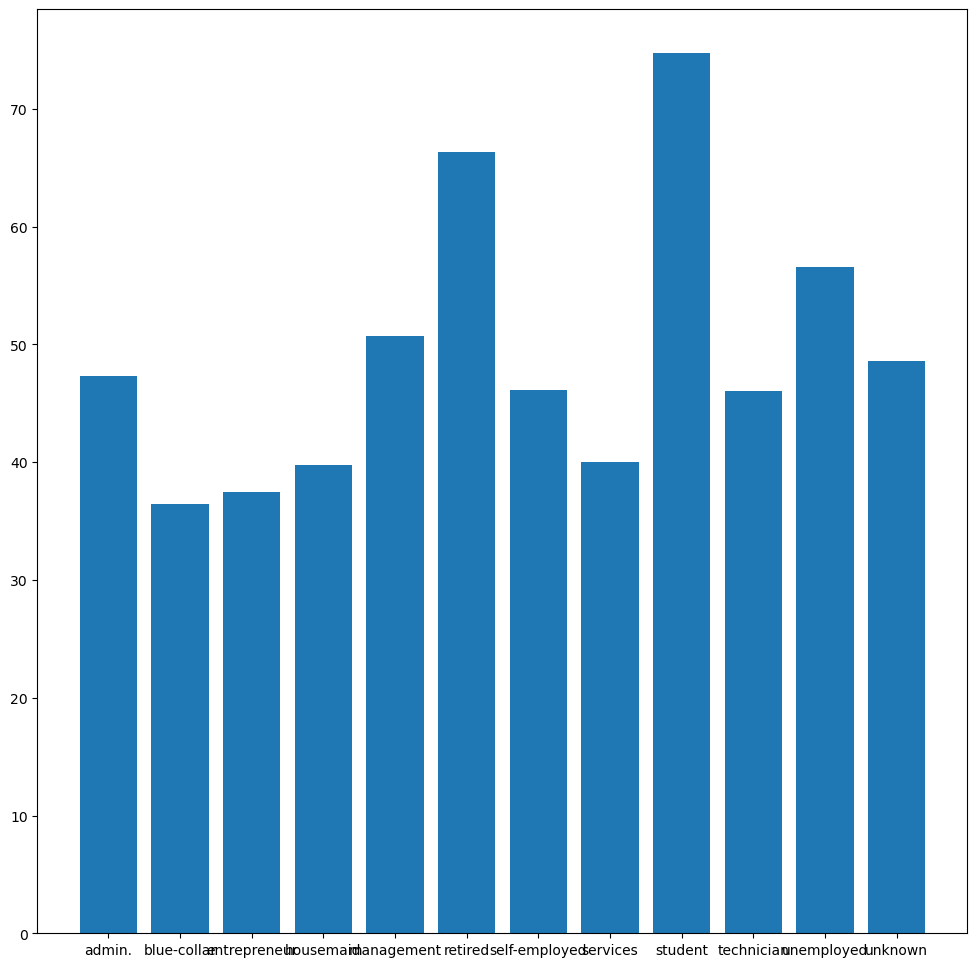

In [42]:
plt.figure(figsize = (12 , 12))
plt.bar(job_subscription_rate.index , job_subscription_rate.values)

In [22]:
# Inference :
# The graph shows percentage of people with different job profiles buying term deposit
# The student has the most percentage

In [43]:
e_rate = data.groupby('education')['deposit'].value_counts(normalize=True).unstack()['yes'] * 100

<BarContainer object of 4 artists>

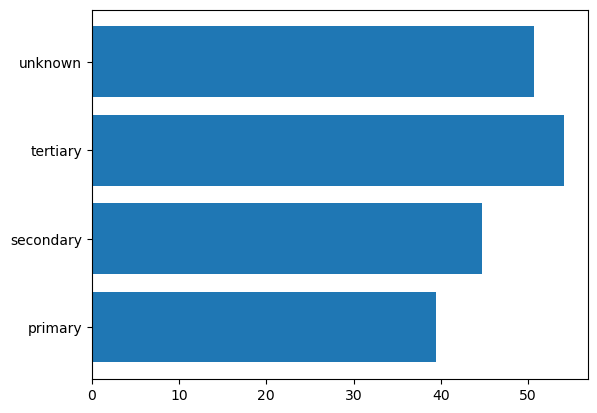

In [44]:
plt.barh(e_rate.index , e_rate.values)

In [30]:
# Inference :
# The graph shows percentage of people with different education profiles buying term deposit
# The tertiary education profile has the most percentage and primary education profile has least

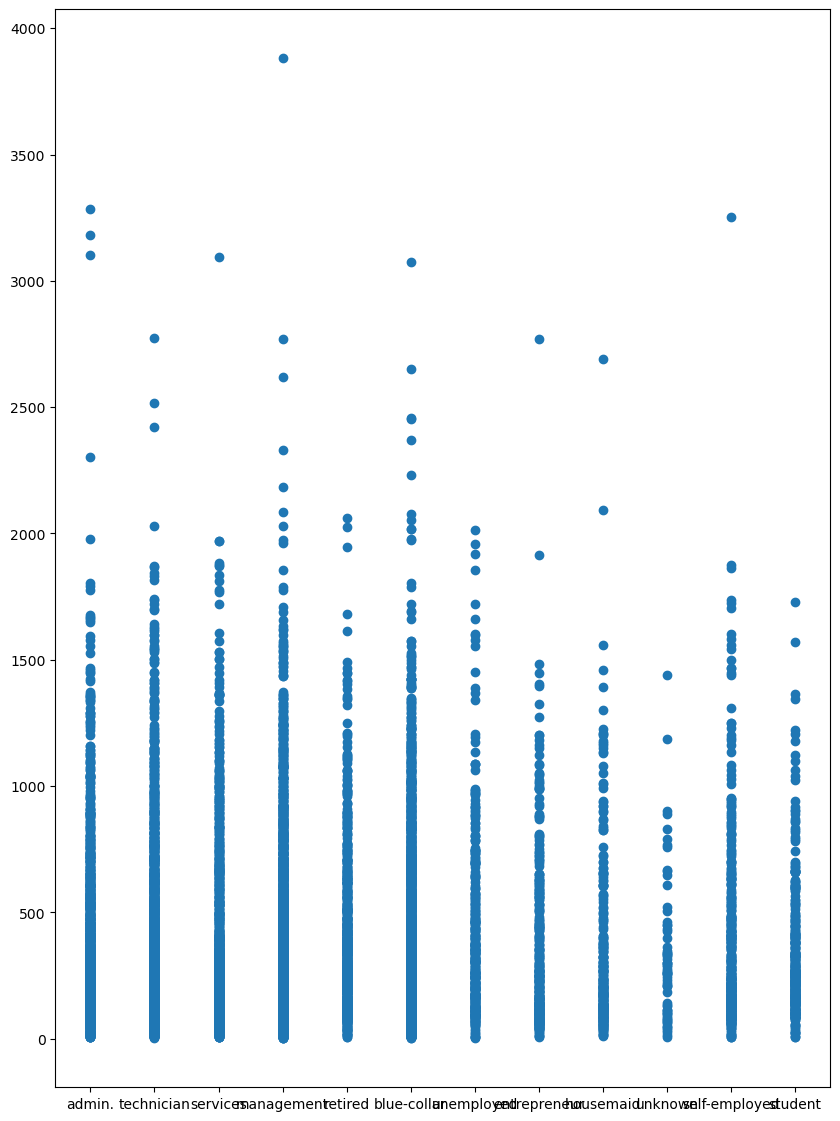

In [48]:
plt.figure(figsize = (10 , 14))
plt.scatter(data['job'] , data['duration'])

In [47]:
# Inference:
# The graph shows the duration the call lasted for different job profiles
# management job profile has the highest duration for the call and unknown job profile has the least

In [49]:
v = data['marital'].value_counts()

([<matplotlib.patches.Wedge at 0x188425641a0>,
 [Text(-0.2365299692821888, 1.0742688553762354, 'married'),
  Text(-0.1613366917751493, -1.0881040721764856, 'single'),
  Text(1.027959384686027, -0.39153480488447606, 'divorced')])

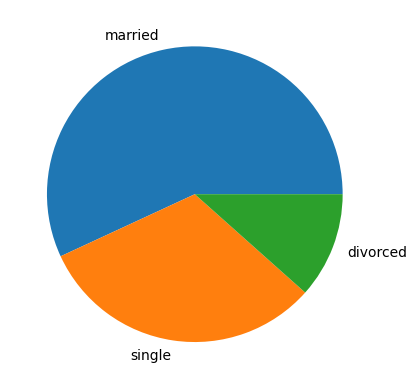

In [50]:
plt.pie(v.values , labels = v.index)

In [51]:
# Inference:
# The graph shows the amount of people with their marital status in dataset
# Most of the people in dataset are married and least number of peope are divorced

<StemContainer object of 3 artists>

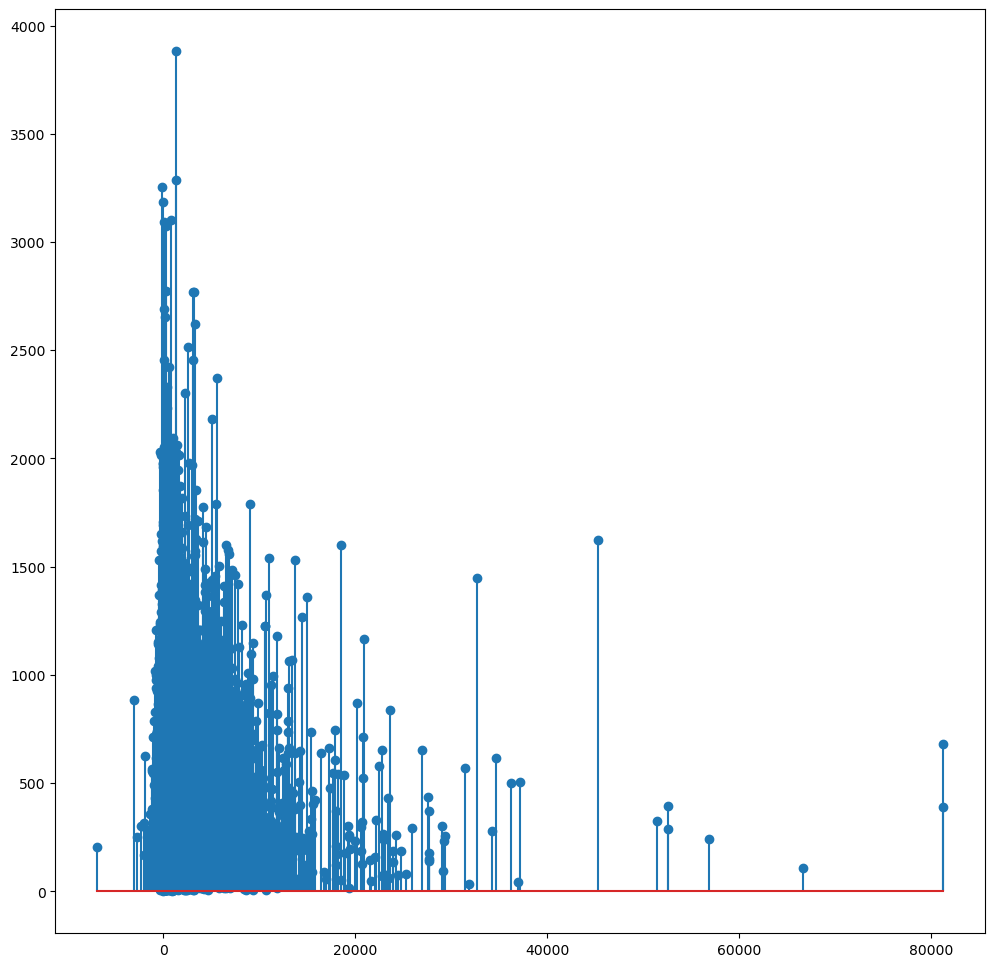

In [54]:
plt.figure(figsize = (12 , 12))
plt.stem(data['balance'] , data['duration'])

In [56]:
# Inference : 
# The graph shows that mostly people having income between 0 to 20000 are more probable to spend more time on call and may be interested rather 
# than people with higher income than 20000.

<Axes: xlabel='age'>

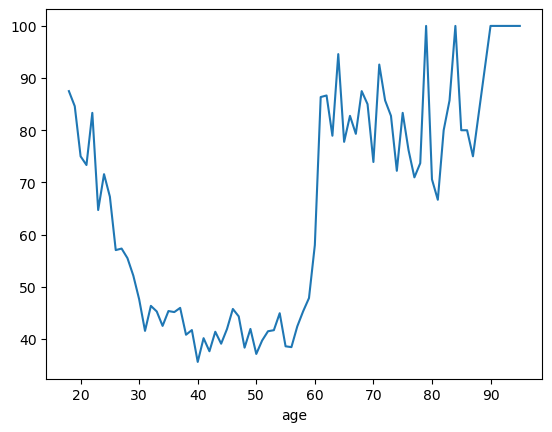

In [58]:
a_rate = data.groupby('age')['deposit'].value_counts(normalize=True).unstack()['yes'] * 100
sns.lineplot(x = a_rate.index ,y =  a_rate.values)

In [59]:
# Inference : 
# The graph shows that people of age in 20s and above 60s are more likely to buy term deposit 
# The people between the age 30 to 60  are least likely

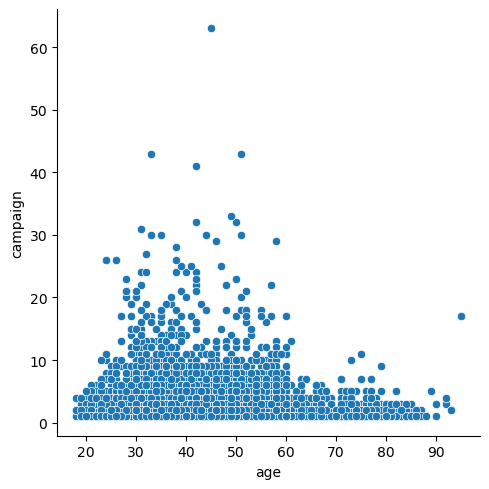

In [61]:
sns.relplot(x = data['age'] , y = data['campaign'])

In [ ]:
# Inference:
# The graph shows that poeple having age between 30 to 60 have been contacted most and other age groups have been contacted lesser

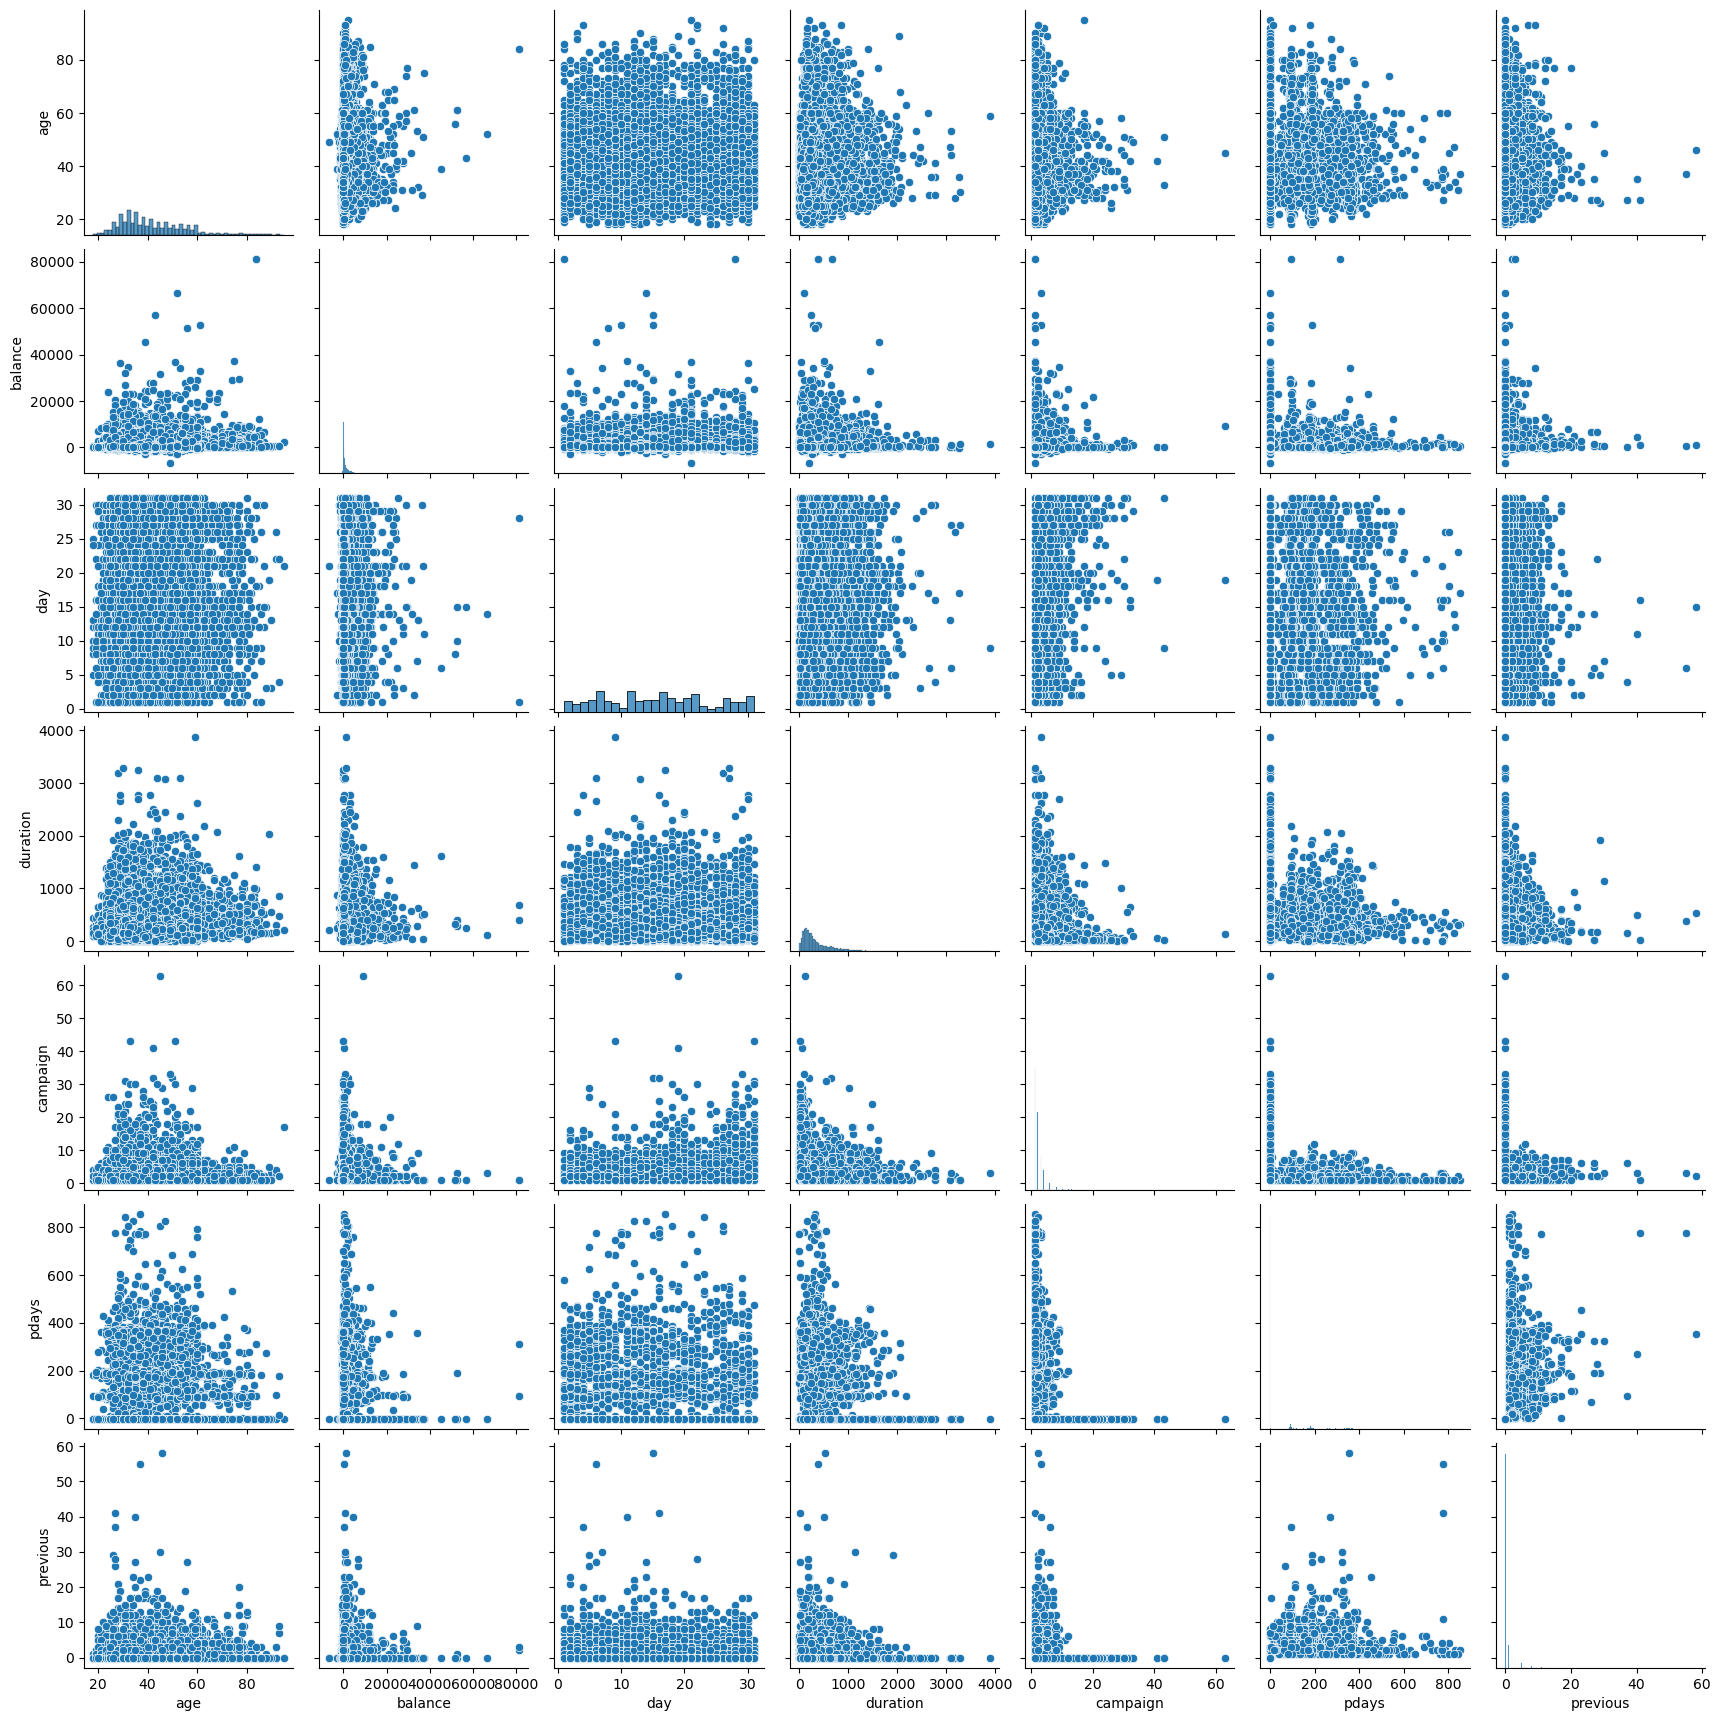

In [63]:
sns.pairplot(data)